# Plots for T3100

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

sb.set(
    context="paper",
    style="white",
    palette=['#B01316', '#A3A3A3', '#3F303F', '#EC6565'],
    font="serif",
    font_scale=1.6,
    rc={
        'lines.linewidth': 1.2,
        'font.serif': 'Latin Modern Roman',
        'mathtext.fontset': 'custom',
        'mathtext.it': 'Latin Modern Math:italic',
        'mathtext.cal': 'Latin Modern Math',
        'mathtext.rm': 'Latin Modern Math',
        'axes.titleweight': 'bold'
    }
)

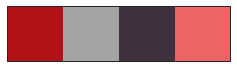

In [2]:
sb.palplot(sb.color_palette())

In [3]:
def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate

In [4]:
def format(axs=None, right=True, space_factor=1):
#     sb.despine(right=right)
    
    if axs is None:
        axs = [plt.gca()]
    for ax in axs:
        ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())

        ax.grid(b=True, which='major', linewidth=1.0)
        ax.grid(b=True, which='minor', linewidth=0.5, linestyle='-.')
    
    plt.tight_layout(0, .4*space_factor, .4*space_factor)
    
def save(name):
    plt.savefig(f'images/plot_{name}.pdf')

In [5]:
def load_results(file, columns, offset=0, time_scale=1):
    data = pd.read_csv(f"data/{file}.csv", names=['time'] + columns)
    data['time'] -= data['time'][0]+offset
    data['time'] *= time_scale
    return data

## Outlier Types

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


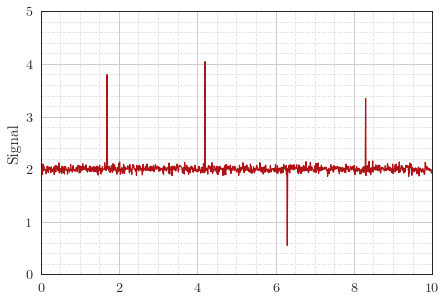

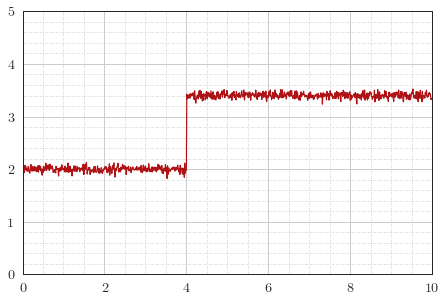

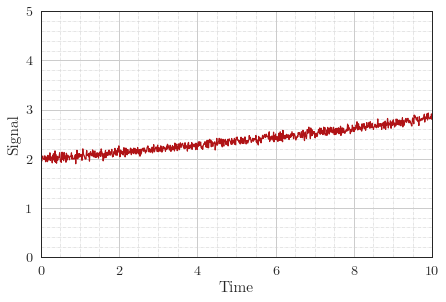

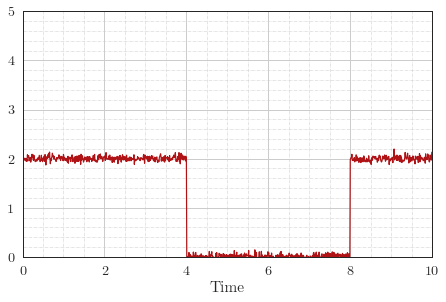

In [6]:
@static_vars(i=0)
def plot_outlier_types(f, name):
    plot_outlier_types.i += 1
    
    plt.figure(figsize=[6, 4])
    x = np.arange(0, 10, 0.01)
    y = 2 + 0.05*np.random.randn(len(x), 1).squeeze() +  + np.array([f(_x) for _x in x])

    plt.plot(x, y)
    plt.xlim([0, 10])
    plt.ylim([0, 5])
    
    if plot_outlier_types.i >= 3:
        plt.xlabel('Time')
    if plot_outlier_types.i % 2 == 1:
        plt.ylabel('Signal')
        
    format()
    save(f'outlier_{name}')

def spike(x):
    if x == 1.7:
        return 1.8
    elif x == 4.2:
        return 2.1
    elif x == 6.3:
        return -1.4
    elif x == 8.3:
        return 1.3
    else:
        return 0
plot_outlier_types(spike, 'spike')

plot_outlier_types(lambda x: 1.4 if x > 4 else 0, 'levelshift')

def drift(x):
    x_start = 0
    if x < x_start:
        return 0
    else:
        return np.exp(0.06*(x - x_start))-1
plot_outlier_types(drift, 'drift')

plot_outlier_types(lambda x: -2 if x > 4 and x < 8 else 0, 'null')


## Velocity Measurements

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


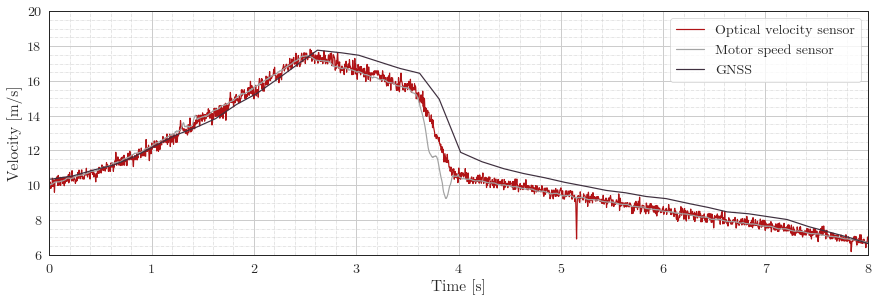

In [7]:
def plot_velocities():
    plt.figure(figsize=[12, 4])
    
    data = load_results("velocities", ['SFII', 'GPS', 'Wheels'], 124)
    plt.plot(data['time'], data["SFII"], label='Optical velocity sensor')
    plt.plot(data['time'], data["Wheels"], label='Motor speed sensor')
    plt.plot(data['time'], data["GPS"], label='GNSS')
    plt.legend()
    
    plt.xlim([0, 8])
    plt.ylim([6, 20])
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    
    format()
    save('velocities')
    
plot_velocities()

## Evaluation

### IMU Fusion

'latinmodern-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

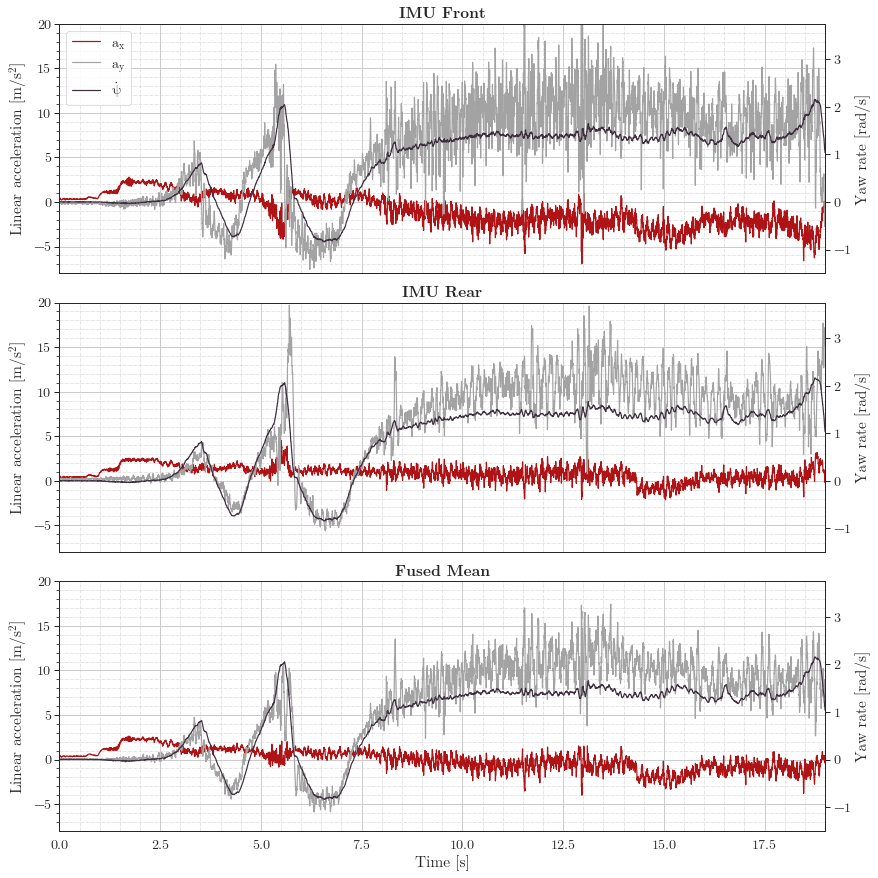

In [8]:
def plot_imu_fusion():
    plt.figure(figsize=[12, 4])
    
    data = []
    for imu in ["imu1", "imu2", "mean"]:
        data.append(load_results("imu_fusion_real_" + imu, [
            "a_x", "a_y", "a_z",
            "d_roll", "d_pitch", "d_yaw",
            "dd_roll", "dd_pitch", "dd_yaw"
        ], 3))
       
    _, axs = plt.subplots(len(data), 1, sharex=True, figsize=[12, 4*len(data)])
    for i, (imu, ax, title) in enumerate(zip(data, axs, ["IMU Front", "IMU Rear", "Fused Mean"])):
        a_x = ax.plot(imu['time'], imu["a_x"], label=r"$a_x$")
        a_y = ax.plot(imu['time'], imu["a_y"], label=r"$a_y$")
            
        ax_dpsi = ax.twinx()
        dpsi = ax_dpsi.plot(imu['time'], imu["d_yaw"], label=r'$\dot\psi$', color="C2")
        
        if i == 0:
            lines = a_x + a_y + dpsi
            ax.legend(lines, [l.get_label() for l in lines])

        ax.set_xlim([0, 19])
        if i == len(data)-1:
            ax.set_xlabel('Time [s]')
        
        ax.set_ylim([-8, 20])
        ax.set_ylabel('Linear acceleration [m/$s^2$]')
        ax.set_title(title)
        
        ax_dpsi.set_ylim([-1.5, 3.75])
        ax_dpsi.set_ylabel('Yaw rate [rad/s]')
    
    format(axs, right=False, space_factor=2)
    save('imu_fusion')
    
plot_imu_fusion()

'latinmodern-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'latinmodern-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'latinmodern-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'latinmodern-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

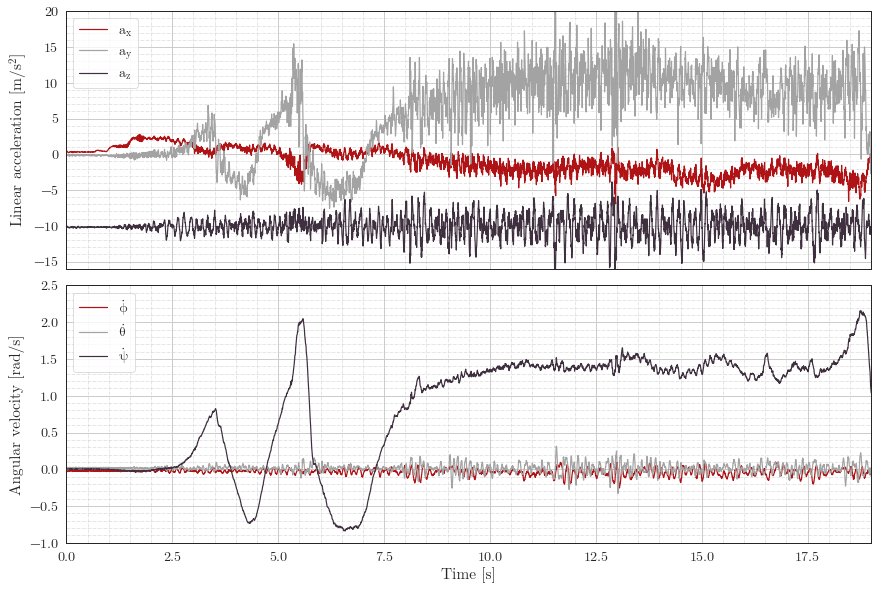

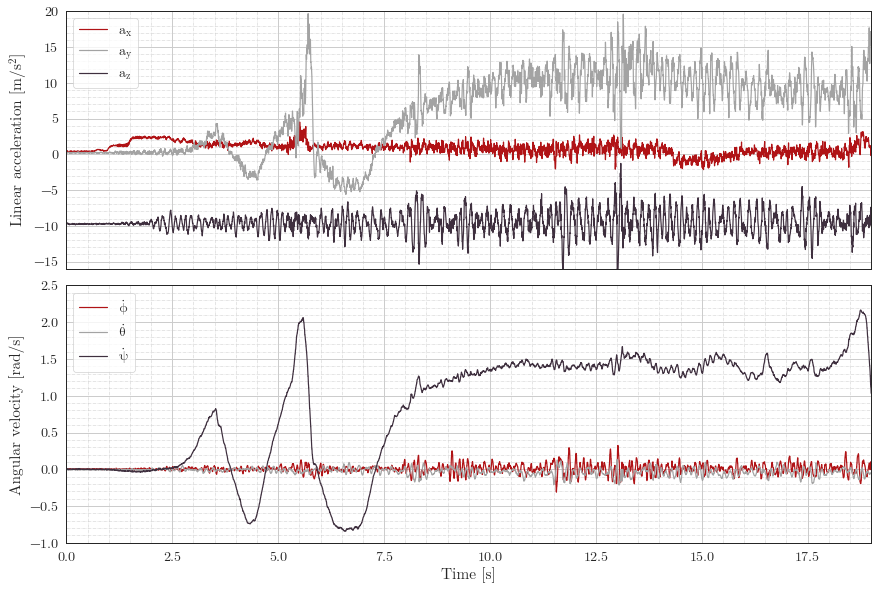

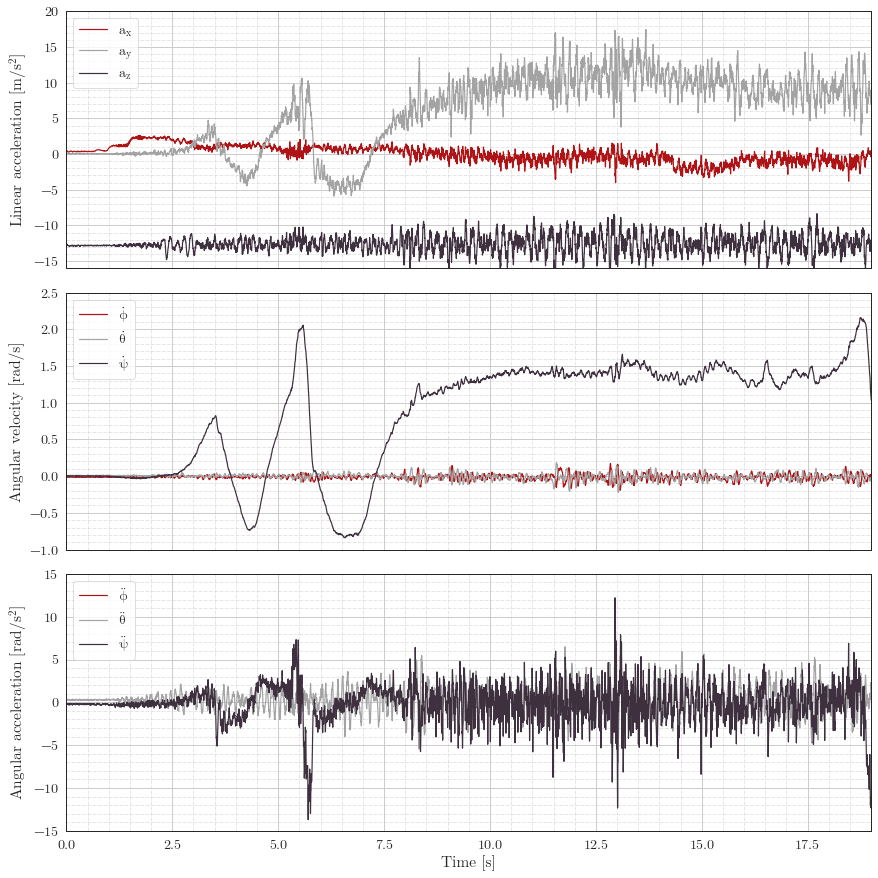

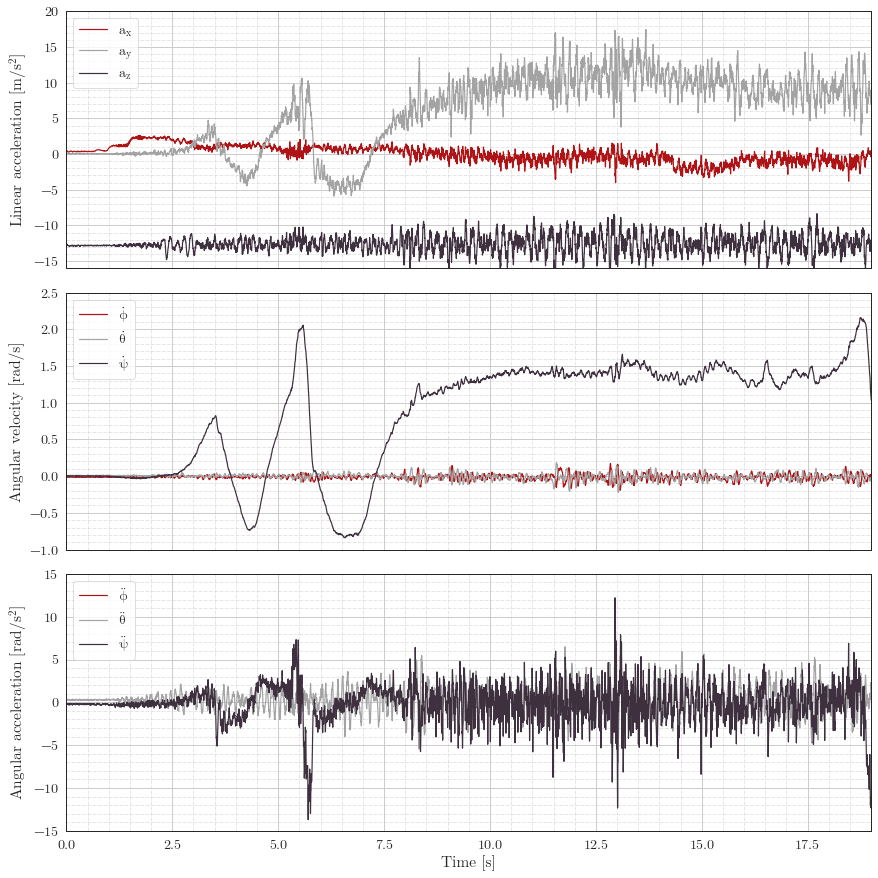

In [9]:
def plot_imu_fusion_full():
    plt.figure(figsize=[12, 4])
    
    data = []
    for name in ["imu1", "imu2", "mean", "ls"]:
        imu = load_results("imu_fusion_real_" + name, [
            "a_x", "a_y", "a_z",
            "d_roll", "d_pitch", "d_yaw",
            "dd_roll", "dd_pitch", "dd_yaw"
        ], 3)
       
        n_plots = 2 if "imu" in name else 3
        _, axs = plt.subplots(n_plots, 1, sharex=True, figsize=[12, 4*n_plots])

        # Linear acceleration
        ax = axs[0]
        ax.plot(imu['time'], imu["a_x"], label=r"$a_x$")
        ax.plot(imu['time'], imu["a_y"], label=r"$a_y$")
        ax.plot(imu['time'], imu["a_z"], label=r"$a_z$")
        
        ax.legend()
        ax.set_ylim([-16, 20])
        ax.set_ylabel('Linear acceleration [m/$s^2$]')
        
        # Angular velocity
        ax = axs[1]
        ax.plot(imu['time'], imu["d_roll"], label=r"$\dot\phi$")
        ax.plot(imu['time'], imu["d_pitch"], label=r"$\dot\theta$")
        ax.plot(imu['time'], imu["d_yaw"], label=r"$\dot\psi$")
        
        ax.legend()
        ax.set_ylim([-1, 2.5])
        ax.set_ylabel('Angular velocity [rad/s]')
        
        if not "imu" in name:
            # Angular acceleration
            ax = axs[2]
            ax.plot(imu['time'], imu["dd_roll"], label=r"$\ddot\phi$")
            ax.plot(imu['time'], imu["dd_pitch"], label=r"$\ddot\theta$")
            ax.plot(imu['time'], imu["dd_yaw"], label=r"$\ddot\psi$")

            ax.legend()
            ax.set_ylim([-15, 15])
            ax.set_ylabel('Angular acceleration [rad/$s^2$]')

        ax.set_xlim([0, 19])
        ax.set_xlabel('Time [s]')
        
        format(axs, space_factor=2)
        save('imu_fusion_full_' + name)
    
plot_imu_fusion_full()

## Failure Detection

'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

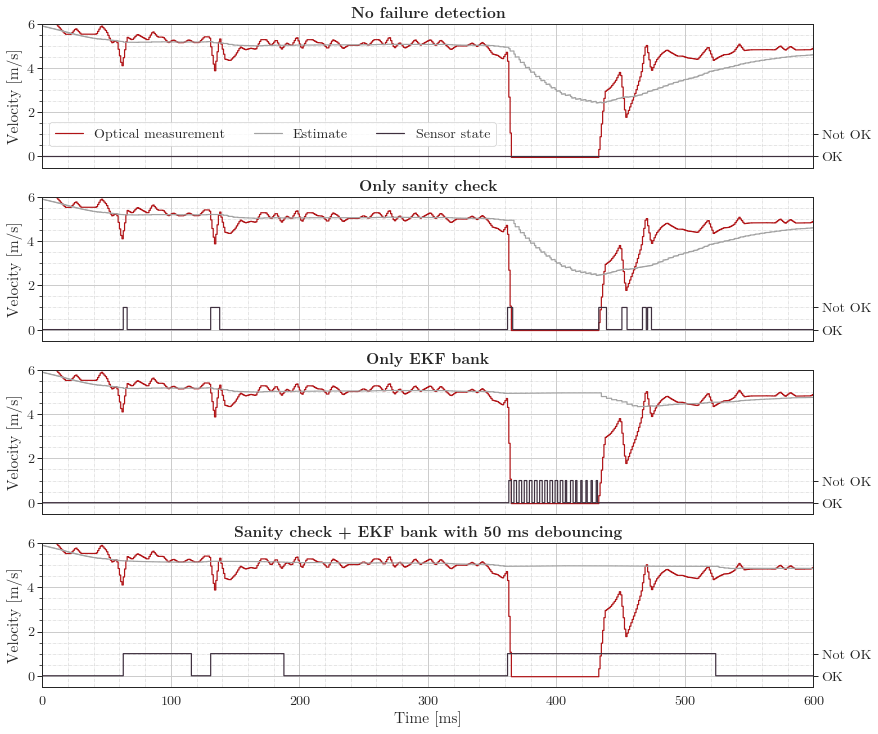

In [10]:
def plot_failure_detection():
    plt.figure(figsize=[12, 4])
    
    datas = []
    for mode in ["off", "sanity", "ekfbank", "both_debounced"]:
        datas.append(load_results("failure_detection_" + mode, [
            "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
            "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
            "f_x", "f_y", "f_vx_sfii", "f_vy_sfii", "f_vx_gps", "f_vx_wheels", "f_psi", "f_dpsi",
        ], 34.21, 1000))
    
    _, axs = plt.subplots(len(datas), 1, sharex=True, figsize=[12, 2.5*len(datas)])
    for i, (data, ax, title) in enumerate(zip(datas, axs, ["No failure detection", "Only sanity check", "Only EKF bank", "Sanity check + EKF bank with 50 ms debouncing"])):
        z = ax.step(data['time'], data["z_vx_sfii"], label="Optical measurement")
        x = ax.step(data['time'], data["x_vx"], label="Estimate")
            
        ax_fail = ax.twinx()
        fail = ax_fail.step(data['time'], 1-data["f_vx_sfii"], label=r'Sensor state', color="C2")
        
        if i == 0:
            lines = z + x + fail
            ax.legend(lines, [l.get_label() for l in lines], loc="lower left", bbox_to_anchor=(0, 0.1), ncol=3)

        ax.set_xlim([0, 600])
        if i == len(datas)-1:
            ax.set_xlabel('Time [ms]')
        
        ax.set_ylim([-0.5, 6])
        ax.set_ylabel('Velocity [m/s]')
        ax.set_title(title)
        
        ax_fail.set_ylim([-0.5, 6])
        ax_fail.set_yticks([0, 1])
        ax_fail.set_yticklabels(['OK', 'Not OK'])
    
    format(axs, right=False, space_factor=2)
    save('failure_detection')
    
plot_failure_detection()

'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

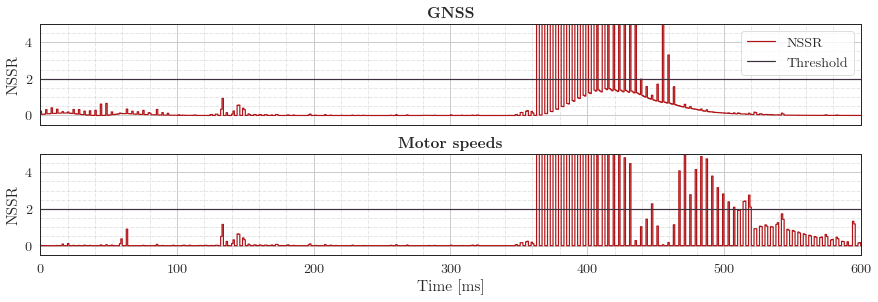

In [11]:
def plot_nssr():
    plt.figure(figsize=[12, 4])
    
    cols = ["gps", "wheels"]
    data = load_results("failure_detection_nssr", ["sfii"] + cols, 34.21, 1000)
    
    _, axs = plt.subplots(len(cols), 1, sharex=True, figsize=[12, 2*len(cols)])
    for i, (col, ax, title, threshold) in enumerate(zip(cols, axs, ["GNSS", "Motor speeds"], [2, 2])):
        ax.step(data['time'], data[col], label="NSSR")
        ax.axhline(threshold, label="Threshold", color="C2")

        if i==0:
            ax.legend()

        ax.set_xlim([0, 600])
        ax.set_ylim([-0.5, 5])
        if i == len(cols)-1:
            ax.set_xlabel('Time [ms]')
        ax.set_ylabel('NSSR')
        ax.set_title(title)
    
    format(axs, space_factor=2)
    save('failure_detection_nssr')
    
plot_nssr()

'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

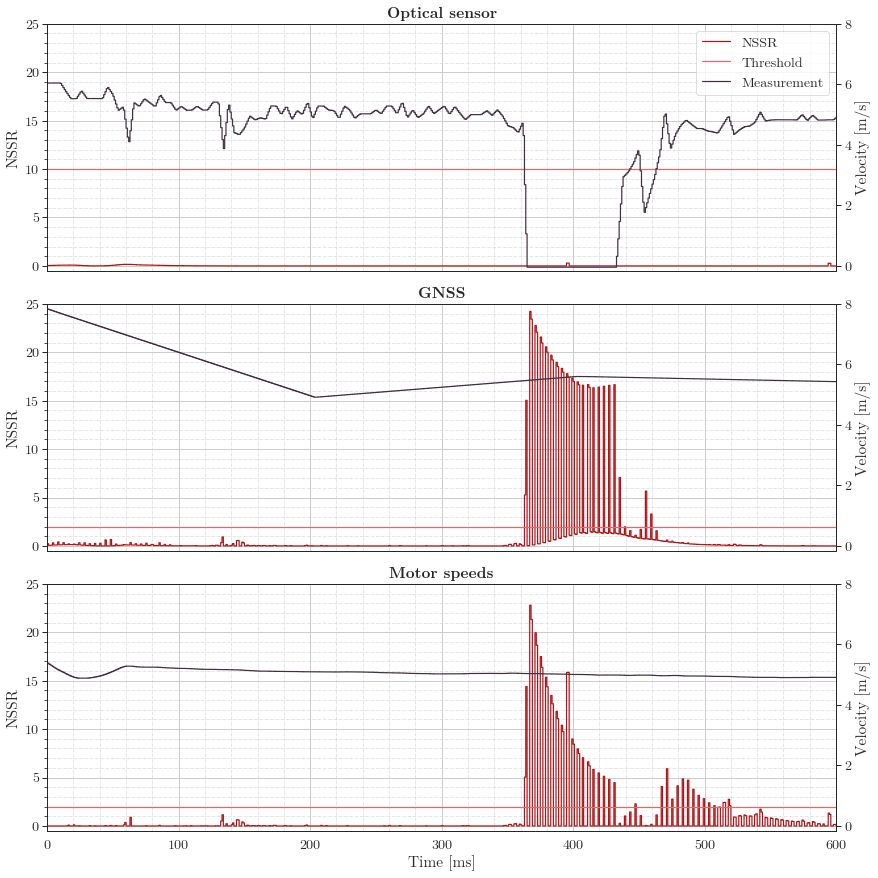

In [12]:
def plot_nssr_full():
    plt.figure(figsize=[12, 4])
    
    cols = ["sfii", "gps", "wheels"]
    nssrs = load_results("failure_detection_nssr", cols, 34.21, 1000)
    data = load_results("failure_detection_ekfbank", [
        "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
        "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
        "f_x", "f_y", "f_vx_sfii", "f_vy_sfii", "f_vx_gps", "f_vx_wheels", "f_psi", "f_dpsi",
    ], 34.21, 1000)
    
    _, axs = plt.subplots(len(cols), 1, sharex=True, figsize=[12, 4*len(cols)])
    for i, (col, col_vx, ax, title, threshold) in enumerate(zip(cols, ["sfii", "gps", "wheels"], axs, ["Optical sensor", "GNSS", "Motor speeds"], [10, 2, 2])):
        nssr = ax.step(nssrs['time'], nssrs[col], label="NSSR")
        thre = ax.axhline(threshold, label="Threshold", color="C3")

        ax_meas = ax.twinx()
        meas = ax_meas.step(data['time'], data["z_vx_"+col_vx], label="Measurement", color="C2")
        
        if i==0:
            lines = nssr + [thre] + meas
            ax.legend(lines, [l.get_label() for l in lines])

        ax.set_xlim([0, 600])
        ax.set_ylim([-0.5, 25])
        if i == len(cols)-1:
            ax.set_xlabel('Time [ms]')
        ax.set_ylabel('NSSR')
        ax.set_title(title)
        
        ax_meas.set_ylabel("Velocity [m/s]")
        ax_meas.set_ylim([-0.16, 8])
    
    format(axs, right=False, space_factor=2)
    save('failure_detection_nssr_full')
    
plot_nssr_full()

## EKF

'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 864x288 with 0 Axes>

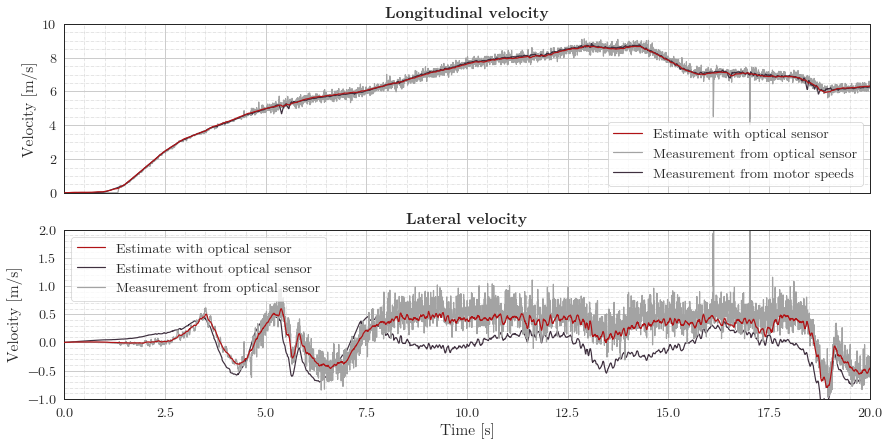

In [13]:
def plot_ekf_velocities():
    plt.figure(figsize=[12, 4])
    
    data = load_results("ekf_noheading", [
        "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
        "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
        "res_x", "res_y", "res_vx_sfii", "res_vy_sfii", "res_vx_gps", "res_vx_wheels", "res_psi", "res_dpsi",
    ])
    data_nosfii = load_results("ekf_nosfii", [
        "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
        "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
        "res_x", "res_y", "res_vx_sfii", "res_vy_sfii", "res_vx_gps", "res_vx_wheels", "res_psi", "res_dpsi",
    ])
       
    _, axs = plt.subplots(2, 1, sharex=True, figsize=[12, 3*2])
    
    # v_x
    ax = axs[0]
    ax.plot(data['time'], data["x_vx"], label=r"Estimate with optical sensor", zorder=5)
    ax.plot(data['time'], data["z_vx_sfii"], label=r"Measurement from optical sensor")
    ax.plot(data['time'], data["z_vx_wheels"], label=r"Measurement from motor speeds")

    ax.legend(loc="lower right")
    ax.set_ylim([0, 10])
    ax.set_ylabel('Velocity [m/s]')
    ax.set_title("Longitudinal velocity")
    
    # v_y
    ax = axs[1]
    ax.plot(data['time'], data["x_vy"], label=r"Estimate with optical sensor", zorder=5)
    ax.plot(data['time'], data_nosfii["x_vy"], label=r"Estimate without optical sensor", color="C2")
    ax.plot(data['time'], data["z_vy_sfii"], label=r"Measurement from optical sensor", color="C1")

    ax.legend()
    ax.set_ylim([-1, 2])
    ax.set_ylabel('Velocity [m/s]')
    ax.set_title("Lateral velocity")
    
    ax.set_xlim([0, 20])
    ax.set_xlabel('Time [s]')
    
    format(axs, space_factor=2)
    save('ekf_velocities')
    
plot_ekf_velocities()

'lmroman10-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


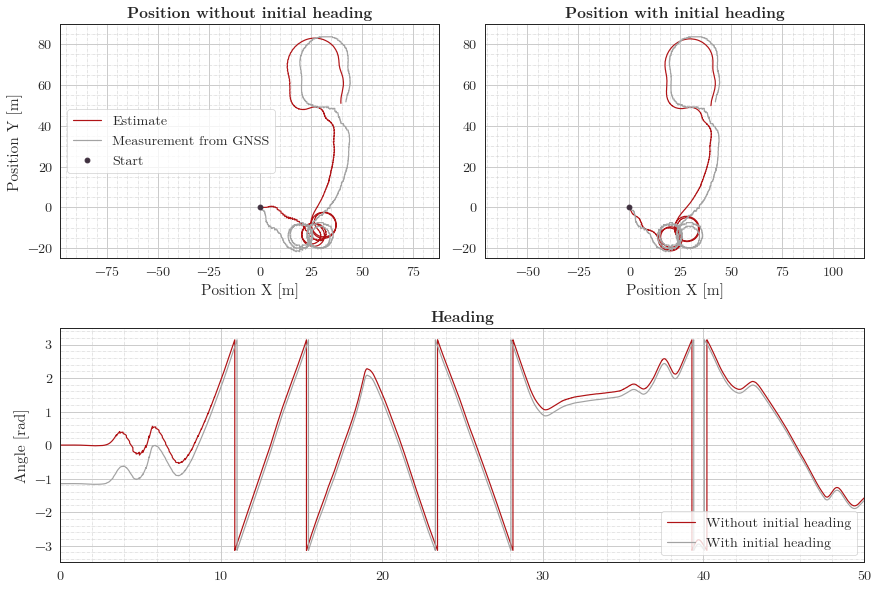

In [14]:
def plot_ekf_pos():
    plt.figure(figsize=[12, 4*2])
    
    data_noheading = load_results("ekf_noheading", [
        "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
        "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
        "res_x", "res_y", "res_vx_sfii", "res_vy_sfii", "res_vx_gps", "res_vx_wheels", "res_psi", "res_dpsi",
    ])
    data_heading = load_results("ekf_heading", [
        "x_x", "x_y", "x_vx", "x_vy", "x_psi", "x_dpsi",
        "z_x", "z_y", "z_vx_sfii", "z_vy_sfii", "z_vx_gps", "z_vx_wheels", "z_psi", "z_dpsi",
        "res_x", "res_y", "res_vx_sfii", "res_vy_sfii", "res_vx_gps", "res_vx_wheels", "res_psi", "res_dpsi",
    ])
       
    axs = []
        
    # Without heading
    ax = plt.subplot(2, 2, 1)
    axs.append(ax)
    ax.plot(data_noheading['x_x'], data_noheading["x_y"], label=r"Estimate")
    ax.plot(data_noheading['z_x'], data_noheading["z_y"], label=r"Measurement from GNSS")
    ax.plot([0], [0], 'o', label='Start')

    ax.legend(loc="center left")
    ax.set_xlabel('Position X [m]')
    ax.set_title("Position without initial heading")
    ax.axis("equal")
    ax.set_ylabel('Position Y [m]')
    ax.set_xlim([-90, 80])
    
    # With heading
    ax = plt.subplot(2, 2, 2, sharey=ax)
    axs.append(ax)
    ax.plot(data_heading['x_x'], data_heading["x_y"], label=r"Estimate")
    ax.plot(data_heading['z_x'], data_heading["z_y"], label=r"Measurement from GNSS")
    ax.plot([0], [0], 'o', label='Start')

    ax.set_xlabel('Position X [m]')
    ax.set_title("Position with initial heading")
    ax.axis("equal")
    ax.set_ylim([-25, 90])
    
    # psi
    ax = plt.subplot(2, 1, 2)
    axs.append(ax)
    ax.plot(data_heading['time'], data_noheading["x_psi"], label=r"Without initial heading")
    ax.plot(data_heading['time'], data_heading["x_psi"], label=r"With initial heading")

    ax.legend()
    ax.set_ylim([-3.5, 3.5])
    ax.set_ylabel('Angle [rad]')
    ax.set_title("Heading")
    ax.set_xlim([0, 50])
    
    format(axs, space_factor=2)
    save('ekf_pos')
    
plot_ekf_pos()